## Project
#### Classifiers (Introduction to Data Science)
#### Name: Rathanon Singh Gandhi
#### ID: 6280205


In [226]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
df = pd.read_csv("weatherAUS.csv")  #importing the dataset

In [228]:
df.info() #get information of all columns, showing number of entries in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [229]:
# This is an array of columns that we will train, where we can only choose columns with float data type
baseInfo = ['Evaporation','Sunshine', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']


In [230]:
#Creating a new array with Rain Tomorrow column as we will be predicting that
checkInfo = baseInfo.copy()
checkInfo.append('RainTomorrow')

With Machine learning, Null values could cause some problem with the algorithms so it is best if we deal with the NaN values in the dataset beforehand.

In [231]:
df = df.dropna(subset= checkInfo)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62089 entries, 6049 to 142302
Data columns (total 23 columns):
Date             62089 non-null object
Location         62089 non-null object
MinTemp          62049 non-null float64
MaxTemp          62070 non-null float64
Rainfall         62089 non-null float64
Evaporation      62089 non-null float64
Sunshine         62089 non-null float64
WindGustDir      58213 non-null object
WindGustSpeed    58230 non-null float64
WindDir9am       60269 non-null object
WindDir3pm       61768 non-null object
WindSpeed9am     61980 non-null float64
WindSpeed3pm     62008 non-null float64
Humidity9am      62089 non-null float64
Humidity3pm      62089 non-null float64
Pressure9am      62003 non-null float64
Pressure3pm      62024 non-null float64
Cloud9am         62089 non-null float64
Cloud3pm         62089 non-null float64
Temp9am          62089 non-null float64
Temp3pm          62089 non-null float64
RainToday        62089 non-null object
RainTomorrow 

## Training and Testing Data
Training and testing data is important for Machine learning. Training datasets allows the algorithm to learn the dataset being used, with which predictions will be made by the algorithm, which in this project is K-Nearest Neighbours (KNN)

In [232]:
X = df[baseInfo]   # data 
Y = df['RainTomorrow'] #target

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, Y_train, Y_test = train_test_split( X , Y, random_state = 42)

In [235]:
len(X_train) / len(X) #this shows that we have 74.9% of the data in the training set

0.7499879205656397

## Reason for using KNN:

Since we have to predict the rainfall for the next day, I will be using K nearest neighbor (KNN) algorithm as this algorithm considers all possible case scenarios and get new cases based on the similarities.

The reason I chose KNN over other classifier is because it is a simple algorithm and has a quick calculation time. This algorithm also has high accuracy as well as we do not need any assumptions about data

In [236]:
from sklearn.neighbors import KNeighborsClassifier

In [237]:
classf= KNeighborsClassifier(n_neighbors= 10)

As you can see below in the graph, it shows that the score is high(0.82 and above) for neighbors 10 and above, so thats how I decided my n_neighbors for the above classifier

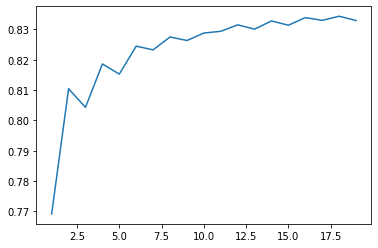

In [238]:
scorearr = []
for n in range(1,20):
    classf = KNeighborsClassifier(n_neighbors=n)
    classf.fit(X_train, Y_train)
    scorearr.append(classf.score(X_test, Y_test))
plt.plot(range(1,20), scorearr)

In [239]:
classf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [240]:
y_pred = classf.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [241]:
sc = classf.score(X_test, Y_test)
scperc = "{:.2f}".format(sc*100)
print(sc)
print(f"The prediction accuracy is {scperc} %")

0.8328931263286736
The prediction accuracy is 83.29 %


(array([48234.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13855.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

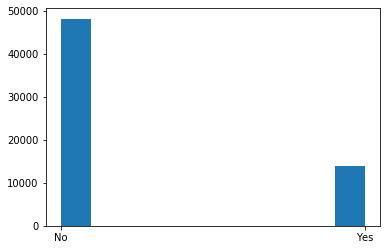

In [242]:
plt.hist(df['RainTomorrow'])

## Confusion Matrix

Confusion matrix will show a summary of the prediction results. It shows the number of correct predictions and incorrect predictions

In [243]:
from sklearn.metrics import confusion_matrix

In [244]:
confusion_matrix(Y_test, y_pred)

array([[11353,   684],
       [ 1910,  1576]])

In the above matrix,

- Top left number (11353) is the true negatives, which in this case is the correct predictions of no rain.
- Bottom left number (1910) is the false negatives, which in this case is the prediction that it wouldn't rain but it actually did.
- Top right number (684) is the false positives, which in this case is the prediction that it would rain but it actually did not.
- Bottom right number (1576) is the true positives, which in this case is the correct predictions of rain

This matrix was to give a more accurate answer and numbers to which predictions were correct and which were not

## Classification Report

This report shows the evaluation of the performance of the model


In [245]:
from sklearn.metrics import classification_report

In [246]:
print(classification_report(Y_test, y_pred)) 

              precision    recall  f1-score   support

          No       0.86      0.94      0.90     12037
         Yes       0.70      0.45      0.55      3486

    accuracy                           0.83     15523
   macro avg       0.78      0.70      0.72     15523
weighted avg       0.82      0.83      0.82     15523



As you can see above, the report shows us the how our models performance is. Precisions shows the ratio of true positive to sum of true and false positives. Recall shows the ration of true positives to sum of true positives and false negative. F1-score shows the mean of precisions and recall. If the F1 score is close to 1, that means the model's performance is good.

## Summary

In conclusion, for this project, before doing anything, I imported the dataset that was given. With that I chose specific columns to help make the predictions, whether it would rain the next day or not. With that done, the next thing was training the data, allowing the algorithm to learn the dataset being used, which in this project is K-Nearest-Neighbor. I used KNN classsifier to predict using the trained data and with that, printed the output score of my accuracy, along with a confusion matrix and a classificationt report.